### Loan Defaulters

Problem Statement:

Using Decision Tree model, classify whether or not the borrower paid back their loan in full.

Why solve this project ?

After completing this project, you will have a better understanding of how to build a decision tree model. In this project, you will apply the following concepts.

- Train-test split
- Correlation between the features
- Decision Tree Modeling
- Evaluation Metrics


In [24]:
import warnings
warnings.filterwarnings("ignore")

##### Data loading

In [1]:
path

In [25]:
#Importing header files
import pandas as pd
from sklearn.model_selection import train_test_split

#Code starts here

#Loading of data
data=pd.read_csv(path)
print(data.head())

#Dropping ID and Target
X=data.drop(['customer.id','paid.back.loan'],1)

#Copying the target
y=data['paid.back.loan'].copy()


#Splitting the data into train and test sets
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=0)

#Code ends here

  customer.id credit.policy             purpose int.rate  installment  \
0       LA001           Yes  debt_consolidation   11.89%       829.10   
1       LA002           Yes         credit_card   10.71%       228.22   
2       LA003           Yes  debt_consolidation   13.57%       366.86   
3       LA004           Yes  debt_consolidation   10.08%       162.34   
4       LA005           Yes         credit_card   14.26%       102.92   

   log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0       11.350407  19.48   737        5639.958333      28854        52.1   
1       11.082143  14.29   707        2760.000000      33623        76.7   
2       10.373491  11.63   682        4710.000000       3511        25.6   
3       11.350407   8.10   712        2699.958333      33667        73.2   
4       11.299732  14.97   667        4066.000000       4740        39.5   

   pub.rec inq.last.6mths delinq.2yrs paid.back.loan  
0        0    Less than 5          No            

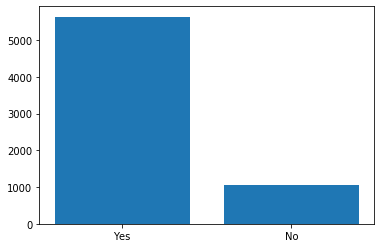

In [26]:
#Importing header files
import matplotlib.pyplot as plt


#Code starts here

#Storing value counts of target variable in 'fully_paid'
fully_paid=y_train.value_counts()

#Plotting bar plot
plt.bar(fully_paid.index, fully_paid)
plt.show()

#Code ends here

##### Feature Split

In [27]:
#Importing header files
import numpy as np
from sklearn.preprocessing import LabelEncoder


#Code starts here

#Removing the last character from the values in column
X_train['int.rate'] = X_train['int.rate'].map(lambda x: str(x)[:-1])

#Dividing the column values by 100
X_train['int.rate']=X_train['int.rate'].astype(float)/100

#Removing the last character from the values in column
X_test['int.rate'] = X_test['int.rate'].map(lambda x: str(x)[:-1])

#Dividing the column values by 100
X_test['int.rate']=X_test['int.rate'].astype(float)/100

#Storing all the numerical type columns in 'num_df'
num_df=X_train.select_dtypes(include=['number']).copy()

#Storing all the categorical type columns in 'cat_df'
cat_df=X_train.select_dtypes(include=['object']).copy()

#Code ends here


##### Numerical Features Visualisation

<Figure size 1440x1440 with 0 Axes>

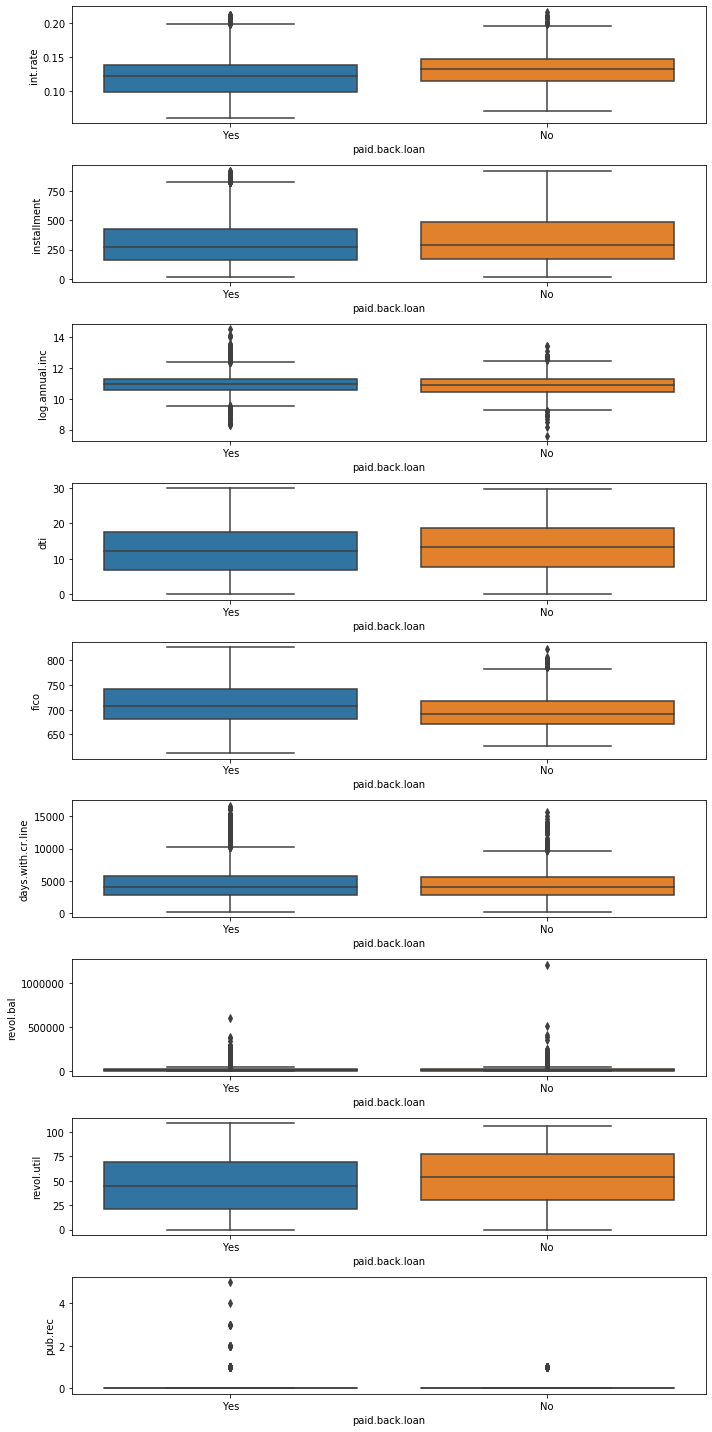

In [28]:
#Importing header files
import seaborn as sns

#Code starts here

#Setting the figure size
plt.figure(figsize=(20,20))


#Storing the columns of 'num_df'
cols=list(num_df.columns)


#Creating subplots
fig,axes=plt.subplots(9,1, figsize=(10,20))

#Looping across rows
for i in range(9):          
    
    #Plotting boxplot
    sns.boxplot(x=y_train,y=num_df[cols[i]],ax=axes[i])
    
    #Avoiding subplots overlapping
    fig.tight_layout()    

    
#Code ends here

##### Categorical Features Visualisation

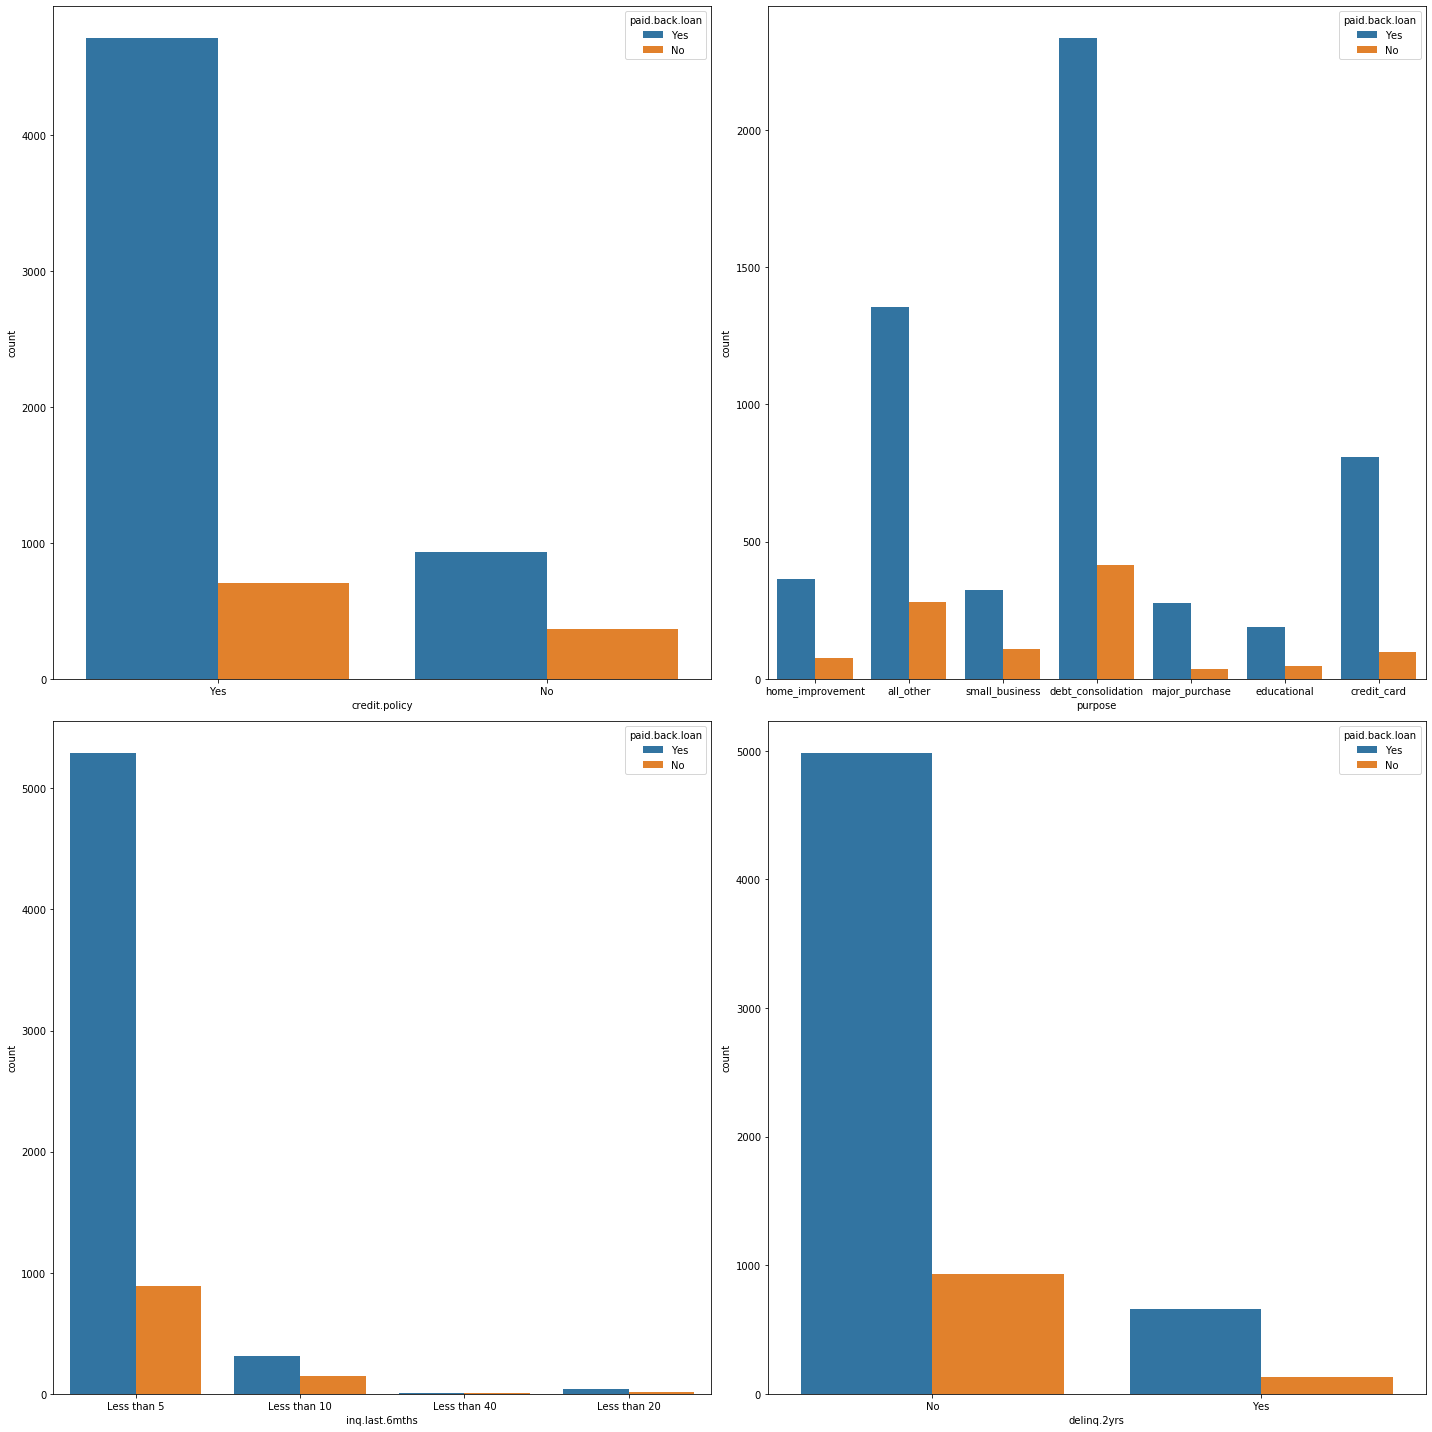

In [29]:
#Code starts here

#Storing the columns of 'cat_df'
cols=list(cat_df.columns)

#Setting up subplots
fig,axes=plt.subplots(2,2, figsize=(20,20))

#Looping through rows
for i in range(0,2):
    
    #Looping through columns
    for j in range(0,2):
        
        #Plotting count plot
        sns.countplot(x=X_train[cols[i*2+j]], hue=y_train,ax=axes[i,j])                        
        
        #Avoiding subplots overlapping
        fig.tight_layout()    

#Code ends here

##### Model Building

In [30]:
#Importing header files
from sklearn.tree import DecisionTreeClassifier

#Code starts here

#Looping through categorical columns
for col in cat_df.columns:
    
    #Filling null values with 'NA'
    X_train[col].fillna('NA',inplace=True)
    
    #Initalising a label encoder object
    le=LabelEncoder()
    
    #Fitting and transforming the column in X_train with 'le'
    X_train[col]=le.fit_transform(X_train[col]) 
    
    #Filling null values with 'NA'
    X_test[col].fillna('NA',inplace=True)
    
    #Fitting the column in X_test with 'le'
    X_test[col]=le.transform(X_test[col]) 

# Replacing the values of y_train
y_train.replace({'No':0,'Yes':1},inplace=True)

# Replacing the values of y_test
y_test.replace({'No':0,'Yes':1},inplace=True)

#Initialising 'Decision Tree' model    
model=DecisionTreeClassifier(random_state=0)

#Training the 'Decision Tree' model
model.fit(X_train, y_train)

#Finding the accuracy of 'Decision Tree' model
acc=model.score(X_test, y_test)

#Printing the accuracy
print(acc)

#Code ends here

0.7334725121781489


##### Decision Tree Pruning

In [31]:
#Importing header files
from sklearn.model_selection import GridSearchCV

#Parameter grid
parameter_grid = {'max_depth': np.arange(3,10), 'min_samples_leaf': range(10,50,10)}

#Code starts here

#Initialising 'Decision Tree' model
model_2 = DecisionTreeClassifier(random_state=0)

#Applying Grid Search of hyper-parameters and finding the optimum 'Decision Tree' model
p_tree = GridSearchCV(model_2, parameter_grid, cv=5)

#Training the optimum 'Decision Tree' model
p_tree.fit(X_train, y_train)

#Finding the accuracy of the optimum 'Decision Tree' model
acc_2 = p_tree.score(X_test, y_test)

#Printing the accuracy
print(acc_2)

#Code ends here

0.837160751565762
